In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import morton
# import lib

In [2]:
# Declare constants
SNOW_FOX_REFERENCE_DATA = 'SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/reference-roundabout'
SNOW_FOX_DATA = 'SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/data-roundabout'

In [3]:

# function read file and convert sample.seconds sent.microsecons to ts and save to the df
def convert_timestamp(file_Name,keys):
    cols= ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds']+keys
    df = pd.read_csv (file_Name, sep=';', usecols = cols)
    
    df['sample_ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
    df = df.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])
    fc= df.pop('sample_ts')
    df.insert(0,'sample_ts',fc)
    return df

In [4]:
df_GPS_20HZ = convert_timestamp(SNOW_FOX_REFERENCE_DATA+'/reference-roundabout.GPS-20Hz.csv',['lat','lon'])
df_Heading_20Hz= convert_timestamp(SNOW_FOX_REFERENCE_DATA+'/reference-roundabout.Heading-20Hz.csv',['northHeading'])
df_Speed_100Hz= convert_timestamp(SNOW_FOX_REFERENCE_DATA+'/reference-roundabout.Speed-100Hz.csv',['groundSpeed'])
df_SteeringWheelAngle_50Hz= convert_timestamp(SNOW_FOX_REFERENCE_DATA+'/reference-roundabout.SteeringWheelAngle-50Hz.csv',['SteeringWhlAngle'])
df_IMU_Acceleration_100Hz= convert_timestamp(SNOW_FOX_REFERENCE_DATA+'/reference-roundabout.Vehicle-IMU-Acceleration-100Hz.csv',['IMULatAcceleration','IMULgtAcceleration','IMUVerAcceleration'])
df_IMU_AngularVelocities_100Hz= convert_timestamp(SNOW_FOX_REFERENCE_DATA+'/reference-roundabout.Vehicle-IMU-AngularVelocities-100Hz.csv',['IMURollRate','IMUYawRate'])

meta_df=df_GPS_20HZ.merge(df_Heading_20Hz,'outer','sample_ts').merge(df_Speed_100Hz,'outer','sample_ts').merge(df_SteeringWheelAngle_50Hz,'outer','sample_ts').merge(df_IMU_Acceleration_100Hz,'outer','sample_ts').merge(df_IMU_AngularVelocities_100Hz,'outer','sample_ts')
meta_df
meta_df.to_csv(r''+SNOW_FOX_REFERENCE_DATA+'/reference-roundabout.meta.csv', sep=';', index = False)


<Axes: xlabel='sample_ts'>

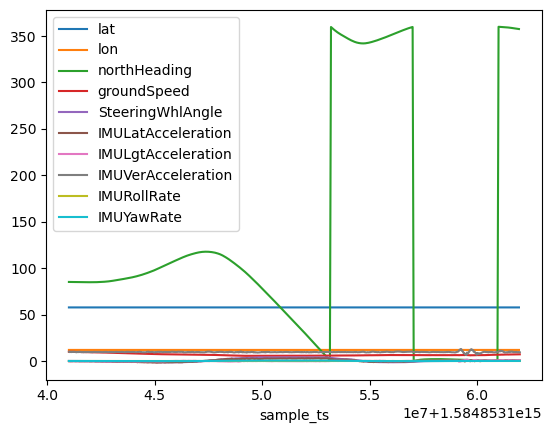

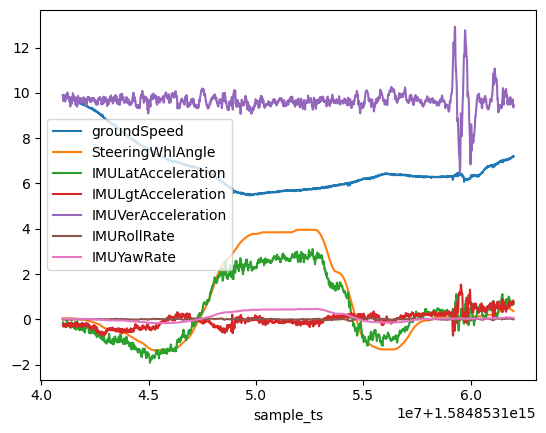

In [5]:
meta_df.plot(x = 'sample_ts', y=['lat','lon','northHeading', 'groundSpeed','SteeringWhlAngle','IMULatAcceleration','IMULgtAcceleration','IMUVerAcceleration','IMURollRate','IMUYawRate'] )
meta_df.plot(x = 'sample_ts', y=['groundSpeed','SteeringWhlAngle','IMULatAcceleration','IMULgtAcceleration','IMUVerAcceleration','IMURollRate','IMUYawRate'] )